In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML

In [3]:
data = pd.read_csv("airbnb.csv", encoding="ISO-8859-1")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [4]:
#Observamos que tenemos datos nulos.
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             7
neighbourhood_group               21669
neighbourhood                         6
latitude                              4
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [5]:
data["host_name"]=data["host_name"].fillna(method="ffill")
data["neighbourhood"]=data["neighbourhood"].fillna(method="bfill")
data["latitude"]=data["latitude"].fillna(round(data["latitude"].mean(),1))
data["longitude"]=data["longitude"].fillna(round(data["longitude"].median(),1))
data["room_type"]=data["room_type"].fillna("Private room")
data["price"]=data["price"].fillna(round(data["price"].mean(),1))
data["minimum_nights"]=data["minimum_nights"].fillna(1)
data["number_of_reviews"]=data["number_of_reviews"].fillna(0)
data["last_review"]=data["last_review"].fillna("31/12/22")
data["reviews_per_month"]=data["reviews_per_month"].fillna(round(data["reviews_per_month"].mean(),1))
data["calculated_host_listings_count"]=data["calculated_host_listings_count"].fillna(1)
data["availability_365"]=data["availability_365"].fillna(method="bfill")
data["number_of_reviews_ltm"]=data["number_of_reviews_ltm"].fillna(method="bfill")
data["neighbourhood_group"]=data["neighbourhood_group"].fillna("Desconocido")
data["name"]=data["name"].fillna("Desconocido")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,Desconocido,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/22,1.60,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Desconocido,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/22,1.60,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Desconocido,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,Desconocido,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,Desconocido,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,Desconocido,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,Desconocido,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/22,1.60,1.0,354.0,0.0


In [6]:
#Verificamos que limpiam que tenemos datos nulos.
valores_nulos=data.isnull().sum()
valores_nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [20]:
#Identificamos outliers
y=data["latitude"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12741,46757982.0,Residencia Master Suite con Terraza,375169008,Residencias,Desconocido,Benito JuÃ¡rez,99.39291,-99.17623,Entire home/apt,3678.0,2.0,0.0,31/12/22,1.60,25.0,337.0,0.0
21665,22107097.0,GREAT & cozy flat in Satelite,387195495,Daniela,Desconocido,Azcapotzalco,119.50787,-99.22067,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0


In [41]:
#Método intercuartílico. Encuentro cuartiles 0.25 y 0.75
y=data["latitude"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
96,329776.0,HabitaciÃ³n Verde.,1683373,Miguel,Desconocido,Tlalpan,19.27510,-99.17757,Private room,303.0,2.0,16.0,25/12/2021,0.27,5.0,0.0,1.0
194,609594.0,House in Xochimilco,2223274,Luis,Desconocido,Xochimilco,19.26541,-99.11365,Entire home/apt,608.0,21.0,12.0,06/10/2020,0.14,1.0,325.0,0.0
206,1920070.0,Mountain Oasis surrender by trees,9953466,Gabriela,Desconocido,Tlalpan,19.24444,-99.17044,Private room,417.0,1.0,3.0,27/10/2019,0.05,1.0,365.0,0.0
213,1945351.0,"Private room. Near COLMEX, UPN, FLACSO",340030,Griselda,Desconocido,Tlalpan,19.28356,-99.21837,Private room,608.0,3.0,2.0,26/01/2018,0.04,3.0,365.0,0.0
277,3506037.0,SUITES BOSQUES MEDICA SUR,17650235,Chelita,Desconocido,CoyoacÃ¡n,19.29966,-99.15624,Private room,533.0,1.0,0.0,31/12/22,1.60,3.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,52622073.0,Departamento Viveros del Lago.\nEnfrente de la...,21515326,Roberto,Desconocido,Azcapotzalco,19.52295,-99.22571,Entire home/apt,1000.0,1.0,25.0,05/06/2022,2.92,2.0,334.0,25.0
21646,33914551.0,Cozy depa,256115671,Atilio,Desconocido,Azcapotzalco,19.51632,-99.22004,Entire home/apt,393.0,2.0,77.0,02/06/2022,2.00,1.0,55.0,33.0
21652,39023239.0,Recamara privada cerca del metro Rosario,298373642,BenjamÃ­n,Desconocido,Azcapotzalco,19.51389,-99.20757,Private room,300.0,2.0,0.0,31/12/22,1.60,1.0,176.0,0.0
21656,16928664.0,Hermosa habitaciÃ³n con baÃ±o privado,101147814,Sandra,Desconocido,Azcapotzalco,19.50816,-99.22190,Private room,579.0,1.0,1.0,06/04/2018,0.02,1.0,87.0,0.0


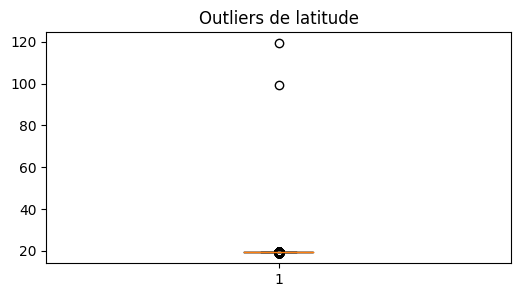

In [43]:
fig = plt.figure(figsize =(6, 3))
plt.boxplot(data["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #dibujamos el diagrama

#En esta variable no se reemplazarán los outliers dado a que el valor representa una ubicación. 
#Por lo tanto, no consideramos correcto el cambiarlo dado a que puede influir en el resultado del análisis. 

In [19]:
#Identificamos outliers
y=data["longitude"]
Limite_Superior1= y.mean() + 3*y.std()
Limite_Inferior1= y.mean() - 3*y.std()
outliers1= data[(y>Limite_Superior1)|(y<Limite_Inferior1)]
outliers1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12003,45519073.0,Spacious 3BR/3.5BATH in heart of Condesa,2593419,Katie,Desconocido,CuauhtÃ©moc,19.41882,-399.17598,Entire home/apt,3040.0,3.0,48.0,22/05/2022,2.65,1.0,165.0,44.0
12009,45454474.0,Bonito departamento cerca del Ãngel,303864680,Leidi Laura,Desconocido,CuauhtÃ©moc,19.42738,299.16998,Entire home/apt,2670.0,1.0,6.0,09/01/2022,0.28,8.0,359.0,1.0


In [44]:
#Método intercuartílico. Encuentro cuartiles 0.25 y 0.75
y=data["longitude"]
Limite_Superior_iqr1= percentile75 + 1.5*iqr
Limite_Inferior_iqr1= percentile25 - 1.5*iqr
outliers_iqr1= data[(y>Limite_Superior_iqr1)|(y<Limite_Inferior_iqr1)]
outliers_iqr1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,Desconocido,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/22,1.60,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Desconocido,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/22,1.60,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Desconocido,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,Desconocido,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,Desconocido,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,Desconocido,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,Desconocido,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/22,1.60,1.0,354.0,0.0


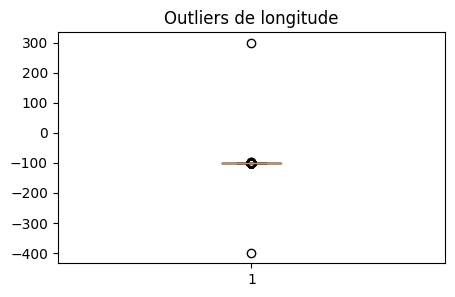

In [45]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #dibujamos el diagrama

#Esta variable tampoco se reemplazarán los valores outliers, por lo mismo que
#es una ubicación y no un valor como tal.

In [46]:
#Identificamos outliers
y=data["price"]
Limite_Superior2= y.mean() + 3*y.std()
Limite_Inferior2= y.mean() - 3*y.std()
outliers2= data[(y>Limite_Superior2)|(y<Limite_Inferior2)]
outliers2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4,44616.0,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Desconocido,CuauhtÃ©moc,19.41162,-99.17794,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
43,1011428.0,PLAZA DEL ARCÃNGEL EN SAN ÃNGEL,5307709,Rosa MarÃ­a,Desconocido,Ãlvaro ObregÃ³n,19.34406,-99.19413,Entire home/apt,7099.0,7.0,17.0,02/01/2022,0.15,1.0,240.0,2.0
117,375032.0,DISTRITO CONDESA B&B ENTIRE HOUSE / OR BY ROOM,1886913,Distrito Condesa,Desconocido,CuauhtÃ©moc,19.40750,-99.17561,Private room,13500.0,1.0,51.0,09/05/2022,0.42,10.0,363.0,5.0
153,499676.0,"Fabulous 3BR penthouse, Views, Historic Center",1297488,Petra,Desconocido,CuauhtÃ©moc,19.43651,-99.13905,Entire home/apt,6058.0,3.0,2.0,14/12/2014,0.02,5.0,275.0,0.0
210,642797.0,"Big Penthouse, Unmatched View. Great Location.",3151538,Leon,Desconocido,Miguel Hidalgo,19.41499,-99.18215,Entire home/apt,6038.0,5.0,93.0,07/05/2022,0.81,3.0,266.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21199,20149090.0,Awesome place in Mexico City,73450494,Raquel,Desconocido,Miguel Hidalgo,19.42565,-99.22649,Entire home/apt,6084.0,3.0,0.0,31/12/22,1.60,1.0,179.0,0.0
21288,24801509.0,Departamento Amueblado Centro Tlalnepantla EDO...,141564634,Cristina,Desconocido,Gustavo A. Madero,19.53845,-99.19309,Entire home/apt,13900.0,60.0,0.0,31/12/22,1.60,1.0,90.0,0.0
21391,48810235.0,Rancho Dos Arbolitos,389642041,Jonathan,Desconocido,Tlalpan,19.09468,-99.23680,Entire home/apt,8500.0,1.0,1.0,06/06/2021,0.08,1.0,365.0,0.0
21489,9090458.0,"Charming, country chic Villa in Cuernavaca",5109616,Gina,Desconocido,Tlalpan,19.21348,-99.30884,Entire home/apt,9127.0,3.0,4.0,16/08/2021,0.10,1.0,364.0,1.0


In [47]:
#Método intercuartílico. Encuentro cuartiles 0.25 y 0.75
y=data["price"]
Limite_Superior_iqr2= percentile75 + 1.5*iqr
Limite_Inferior_iqr2= percentile25 - 1.5*iqr
outliers_iqr2= data[(y>Limite_Superior_iqr2)|(y<Limite_Inferior_iqr2)]
outliers_iqr2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,Desconocido,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/22,1.60,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Desconocido,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/22,1.60,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Desconocido,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,Desconocido,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,Desconocido,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,Desconocido,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,Desconocido,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/22,1.60,1.0,354.0,0.0


In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["price"]) 
plt.title("Outliers del precio")
plt.show() #dibujamos el diagrama

In [21]:
#Buscamos la media de price
price_mean = data["price"].mean()
price_mean

1450.4830633624072

In [22]:
#Cambiamos los valores outliers de precio por la media.
data["price"] = np.where(((data["price"]>Limite_Superior2) | (data["price"]<Limite_Inferior2)),1450.4830,data["price"])
data["price"]

0          850.0
1         4056.0
2          752.0
3          971.0
4        18000.0
          ...   
21664      673.0
21665      897.0
21666      230.0
21667      690.0
21668     3228.0
Name: price, Length: 21669, dtype: float64

In [ ]:
#Identificamos outliers
y=data["minimum_nights"]
Limite_Superior3= y.mean() + 3*y.std()
Limite_Inferior3= y.mean() - 3*y.std()
outliers3= data[(y>Limite_Superior3)|(y<Limite_Inferior3)]
outliers3

In [ ]:
#Método intercuartílico. Encuentro cuartiles 0.25 y 0.75
y=data["minimum_nights"]
Limite_Superior_iqr3= percentile75 + 1.5*iqr
Limite_Inferior_iqr3= percentile25 - 1.5*iqr
outliers_iqr3= data[(y>Limite_Superior_iqr3)|(y<Limite_Inferior_iqr3)]
outliers_iqr3

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["minimum_nights"]) 
plt.title("Outliers de mínimo de noches")
plt.show() #dibujamos el diagrama

In [23]:
#Buscamos la media de mínimo de noches
MN_mean = data["minimum_nights"].mean()
MN_mean

4.841294014490747

In [ ]:
#Cambiamos los valores outliers de precio por la media.
data["minimum_nights"] = np.where(((data["minimum_nights"]>Limite_Superior3) | (data["minimum_nights"]<Limite_Inferior3)),4.84,data["minimum_nights"])
data["minimum_nights"]

In [ ]:
#Identificamos outliers
y=data["number_of_reviews"]
Limite_Superior4= y.mean() + 3*y.std()
Limite_Inferior4= y.mean() - 3*y.std()
outliers4= data[(y>Limite_Superior4)|(y<Limite_Inferior4)]
outliers4

In [ ]:
#Método intercuartílico. Encuentro cuartiles 0.25 y 0.75
y=data["number_of_reviews"]
Limite_Superior_iqr4= percentile75 + 1.5*iqr
Limite_Inferior_iqr4= percentile25 - 1.5*iqr
outliers_iqr4= data[(y>Limite_Superior_iqr4)|(y<Limite_Inferior_iqr4)]
outliers_iqr4

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["number_of_reviews"]) 
plt.title("Outliers de número de reseñas")
plt.show() #dibujamos el diagrama

In [24]:
#Buscamos la media de número de reseñas
rev_mean = data["number_of_reviews"].mean()
rev_mean

31.61811804882551

In [ ]:
#Cambiamos los valores outliers de precio por la media.
data["number_of_reviews"] = np.where(((data["number_of_reviews"]>Limite_Superior4) | (data["number_of_reviews"]<Limite_Inferior4)),31.61,data["number_of_reviews"])
data["number_of_reviews"]

In [ ]:
#Identificamos outliers
y=data["reviews_per_month"]
Limite_Superior5= y.mean() + 3*y.std()
Limite_Inferior5= y.mean() - 3*y.std()
outliers5= data[(y>Limite_Superior5)|(y<Limite_Inferior5)]
outliers5

In [ ]:
#Método intercuartílico. Encuentro cuartiles 0.25 y 0.75
y=data["reviews_per_month"]
Limite_Superior_iqr5= percentile75 + 1.5*iqr
Limite_Inferior_iqr5= percentile25 - 1.5*iqr
outliers_iqr5= data[(y>Limite_Superior_iqr5)|(y<Limite_Inferior_iqr5)]
outliers_iqr5

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["reviews_per_month"]) 
plt.title("Outliers de reseñas por mes")
plt.show() #dibujamos el diagrama

In [25]:
#Buscamos la media de reseñas por mes
RM_mean = data["reviews_per_month"].mean()
RM_mean

1.5886044579814482

In [ ]:
#Cambiamos los valores outliers de precio por la media.
data["reviews_per_month"] = np.where(((data["reviews_per_month"]>Limite_Superior5) | (data["reviews_per_month"]<Limite_Inferior5)),1.58,data["reviews_per_month"])
data["reviews_per_month"]

In [35]:
#Identificamos outliers
y=data["availability_365"]
Limite_Superior6= y.mean() + 3*y.std()
Limite_Inferior6= y.mean() - 3*y.std()
outliers6= data[(y>Limite_Superior6)|(y<Limite_Inferior6)]
outliers6

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [38]:
#Método intercuartílico. Encuentro cuartiles 0.25 y 0.75
y=data2["availability_365"]
Limite_Superior_iqr6= percentile75 + 1.5*iqr
Limite_Inferior_iqr6= percentile25 - 1.5*iqr
outliers_iqr6= data[(y>Limite_Superior_iqr6)|(y<Limite_Inferior_iqr6)]
outliers_iqr6

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,Desconocido,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/22,1.60,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Desconocido,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/22,1.60,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,Desconocido,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Desconocido,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,Desconocido,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,Desconocido,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,Desconocido,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,Desconocido,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/22,1.60,1.0,354.0,0.0


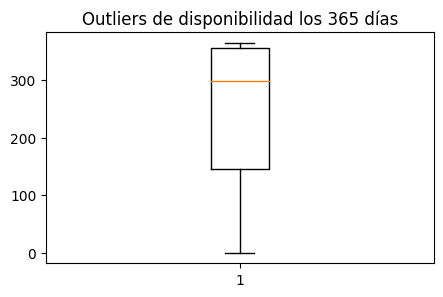

In [36]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["availability_365"]) 
plt.title("Outliers de disponibilidad los 365 días")
plt.show() #dibujamos el diagrama

In [26]:
#Buscamos la media de availability_365
av_mean = data["availability_365"].mean()
av_mean

243.4755180211362

In [28]:
#Cambiamos los valores outliers de precio por la media.
data["availability_365"] = np.where(((data["availability_365"]>Limite_Superior6) | (data["availability_365"]<Limite_Inferior6)),243.47,data["availability_365"])
data["availability_365"]

0        325.0
1        363.0
2        365.0
3        203.0
4        347.0
         ...  
21664    314.0
21665    314.0
21666    140.0
21667    354.0
21668     10.0
Name: availability_365, Length: 21669, dtype: float64

In [48]:
#Convertimos el nueva data frame en csv
data.to_csv("Etapa1.csv")